# Importing Libraries and Reading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the directory
input_dir = os.path.dirname(os.getcwd())+os.sep+"Input_Dataset"
output_dir = os.path.dirname(os.getcwd())+os.sep+"Output_Dataset"

# Load the data
train_df = pd.read_csv(input_dir+os.sep+"Train.csv")
test_df = pd.read_csv(input_dir+os.sep+"Test.csv")
sample_submission = pd.read_csv(input_dir+os.sep+"Submission.csv")  

# Exploratory Data Analysis

In [3]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


In [4]:
train_df.dtypes

Holiday               float64
Temperature           float64
Rainfall_last_hour    float64
Snowfall_last_hour    float64
Cloud_Cover             int64
Weather                object
Weather_Desc           object
TimeStamp              object
Date                   object
Traffic_Vol             int64
dtype: object

## Treating null values

In [5]:
train_df.isnull().sum()

Holiday               38323
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
TimeStamp                 0
Date                      0
Traffic_Vol               0
dtype: int64

## Imputing Holiday column as 0

In [6]:
train_df["Holiday"] = train_df["Holiday"].fillna(0)
test_df["Holiday"] = test_df["Holiday"].fillna(0)

## Converting Timestamp into date time to import day based features

In [7]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


In [8]:
train_df["TimeStamp"] = pd.to_datetime(train_df["TimeStamp"])
test_df["TimeStamp"] = pd.to_datetime(test_df["TimeStamp"])

C:\Users\INNODVOH\AppData\Local\Temp\ipykernel_1784\3063770804.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["TimeStamp"] = pd.to_datetime(train_df["TimeStamp"])
C:\Users\INNODVOH\AppData\Local\Temp\ipykernel_1784\3063770804.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["TimeStamp"] = pd.to_datetime(test_df["TimeStamp"])


In [9]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,2008-02-10 09:00:00,02/10/08,5555
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 10:00:00,02/10/08,4525
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928


# Feature Engineering 

## Adding Date Time Features

In [10]:
def add_day_features(df):
    # Extract day of the week
    df['DayOfWeek'] = df['TimeStamp'].dt.dayofweek
    # Classify as weekday or weekend
    df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    return df

def add_hour_feature(df):
    # Extract hour of the day
    df['HourOfDay'] = df['TimeStamp'].dt.hour
    return df

def add_date_features(df):
    # Extract year, month, and day
    df['Year'] = df['TimeStamp'].dt.year
    df['Month'] = df['TimeStamp'].dt.month
    df['Day'] = df['TimeStamp'].dt.day
    return df

# Apply the function to train and test dataframes
train_df = add_date_features(train_df)
test_df = add_date_features(test_df)

# Apply the function to train and test dataframes
train_df = add_hour_feature(train_df)
test_df = add_hour_feature(test_df)

# Apply the function to train and test dataframes
train_df = add_day_features(train_df)
test_df = add_day_features(test_df)

# Display the updated dataframe
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,2008-02-10 09:00:00,02/10/08,5555,2008,2,10,9,6,1
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 10:00:00,02/10/08,4525,2008,2,10,10,6,1
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772,2008,2,10,11,6,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031,2008,2,10,12,6,1
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928,2008,2,10,13,6,1


In [11]:
cat_cols = ['Month', 'Day', 'DayOfWeek', 'HourOfDay', 'IsWeekend','Holiday']
# cat_cols  = ['IsWeekend','Holiday']


for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [12]:
train_df.dtypes

Holiday                     category
Temperature                  float64
Rainfall_last_hour           float64
Snowfall_last_hour           float64
Cloud_Cover                    int64
Weather                       object
Weather_Desc                  object
TimeStamp             datetime64[ns]
Date                          object
Traffic_Vol                    int64
Year                           int32
Month                       category
Day                         category
HourOfDay                   category
DayOfWeek                   category
IsWeekend                   category
dtype: object

In [13]:
train_df.shape,test_df.shape

((38373, 16), (2208, 16))

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

def preprocess_data(df,num_cols,cat_cols):

    # Preprocessing for numerical data
    num_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Preprocessing for categorical data
    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
#     cat_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('label', LabelEncoder())
# ])





    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ])
    
    # Apply transformations
    df_preprocessed = preprocessor.fit_transform(df)
    
    return df_preprocessed,preprocessor

num_cols = ['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover']
cat_cols = ['IsWeekend', 'Holiday', 'Weather', 'Weather_Desc']

X = train_df[num_cols + cat_cols]
y  = train_df['Traffic_Vol']

# Split the train_df into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


# split_index = int(0.9*len(X))
# X_train = X.iloc[:split_index]
# y_train = y.iloc[:split_index]
# X_val = X.iloc[split_index:]
# y_val = y.iloc[split_index:]



# Preprocess the train_df
X_train,preprocessor = preprocess_data(X_train,num_cols,cat_cols)
X_val = preprocessor.transform(X_val)
# X_test = preprocessor.transform(test_df)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'XGB Regressor': XGBRegressor(random_state=42)
}

# Dictionary to store RMSE values
rmse_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Store the RMSE score
    rmse_scores[model_name] = rmse


    print(f'{model_name}: RMSE = {rmse:.4f}')



# Print RMSE scores
# for model_name, rmse in rmse_scores.items():
#     print(f'{model_name}: RMSE = {rmse:.4f}')

Linear Regression: RMSE = 1972.0338
Decision Tree: RMSE = 2673.3225
Random Forest: RMSE = 2237.7845
Gradient Boosting: RMSE = 1930.6387
Support Vector Regressor: RMSE = 1980.7845
XGB Regressor: RMSE = 1954.7583


# Preparing Test Set and Generating Predictions

In [17]:
test_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
0,0.0,297.65,0.0,0,1,Clear skies,Clear skies,2014-01-07 00:00:00,01/07/14,NaN,2014,1,7,0,1,0
1,0.0,297.45,0.0,0,1,Clear skies,Clear skies,2014-01-07 01:00:00,01/07/14,NaN,2014,1,7,1,1,0
2,0.0,296.75,0.0,0,1,Rainfall,Soft rain,2014-01-07 02:00:00,01/07/14,NaN,2014,1,7,2,1,0
3,0.0,296.42,0.0,0,1,Rainfall,Steady rain,2014-01-07 03:00:00,01/07/14,NaN,2014,1,7,3,1,0
4,0.0,295.56,0.0,0,40,Rainfall,Soft rain,2014-01-07 04:00:00,01/07/14,NaN,2014,1,7,4,1,0


In [18]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,2008-02-10 09:00:00,02/10/08,5555,2008,2,10,9,6,1
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 10:00:00,02/10/08,4525,2008,2,10,10,6,1
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772,2008,2,10,11,6,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031,2008,2,10,12,6,1
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928,2008,2,10,13,6,1


In [19]:
train_x,preprocessor_m  = preprocess_data(train_df[num_cols + cat_cols],num_cols,cat_cols)
y_train = train_df['Traffic_Vol']

In [20]:
xgb = XGBRegressor(random_state=42)
xgb.fit(train_x, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [21]:
test_x = preprocessor_m.transform(test_df[num_cols + cat_cols])
test_df['Traffic_Vol'] = xgb.predict(test_x)

In [22]:
test_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
0,0.0,297.65,0.0,0,1,Clear skies,Clear skies,2014-01-07 00:00:00,01/07/14,3584.197266,2014,1,7,0,1,0
1,0.0,297.45,0.0,0,1,Clear skies,Clear skies,2014-01-07 01:00:00,01/07/14,3773.607422,2014,1,7,1,1,0
2,0.0,296.75,0.0,0,1,Rainfall,Soft rain,2014-01-07 02:00:00,01/07/14,2583.807617,2014,1,7,2,1,0
3,0.0,296.42,0.0,0,1,Rainfall,Steady rain,2014-01-07 03:00:00,01/07/14,2355.086670,2014,1,7,3,1,0
4,0.0,295.56,0.0,0,40,Rainfall,Soft rain,2014-01-07 04:00:00,01/07/14,2968.165527,2014,1,7,4,1,0


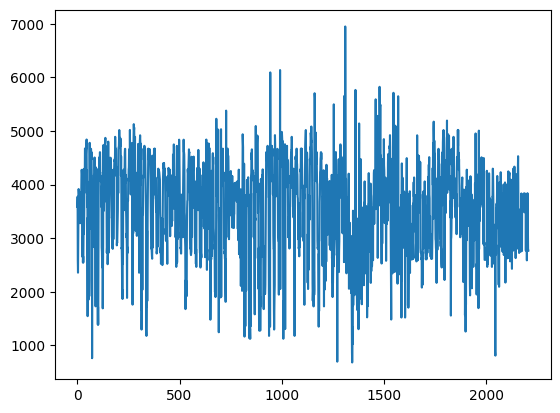

In [23]:
plt.plot(test_df["Traffic_Vol"])
plt.show()

In [25]:
sample_submission['Traffic_Vol'] = test_df['Traffic_Vol']

In [26]:
sample_submission.to_csv(output_dir+os.sep+"01_XGB.csv", index=False)

In [27]:
xgb.feature_importances_

array([0.03553202, 0.01786352, 0.006002  , 0.04186706, 0.02955594,
       0.        , 0.08307651, 0.        , 0.03570545, 0.00769508,
       0.02817955, 0.05458584, 0.01780842, 0.03939986, 0.02583987,
       0.02177109, 0.03193313, 0.04649265, 0.00399939, 0.        ,
       0.03442034, 0.0093371 , 0.        , 0.01752036, 0.        ,
       0.0022023 , 0.        , 0.01962094, 0.03336217, 0.02860966,
       0.00683962, 0.00157191, 0.00282916, 0.02212345, 0.00975785,
       0.02135983, 0.04815652, 0.00600391, 0.03121801, 0.01540805,
       0.01453686, 0.00675682, 0.        , 0.03907859, 0.02223257,
       0.02009496, 0.00320096, 0.02662531, 0.00691199, 0.00960346,
       0.01330999, 0.        , 0.        ], dtype=float32)

#  Plain XGB no feature encoding

In [28]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,2008-02-10 09:00:00,02/10/08,5555,2008,2,10,9,6,1
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 10:00:00,02/10/08,4525,2008,2,10,10,6,1
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772,2008,2,10,11,6,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031,2008,2,10,12,6,1
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928,2008,2,10,13,6,1


In [29]:
importances = xgb.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

                                              Feature  Importance
6                                    cat__Holiday_0.0    0.083077
11                          cat__Weather_Cloudy skies    0.054586
36              cat__Weather_Desc_Nearby rain showers    0.048157
17                        cat__Weather_Stormy weather    0.046493
3                                    num__Cloud_Cover    0.041867
13                             cat__Weather_Light fog    0.039400
43                         cat__Weather_Desc_Snowfall    0.039079
8                     cat__Weather_Airborne particles    0.035705
0                                    num__Temperature    0.035532
20         cat__Weather_Desc_Approaching thunderstorm    0.034420
28                cat__Weather_Desc_Fragmented clouds    0.033362
16                              cat__Weather_Snowfall    0.031933
38              cat__Weather_Desc_Partly cloudy skies    0.031218
4                                    cat__IsWeekend_0    0.029556
29        

<Axes: xlabel='Feature'>

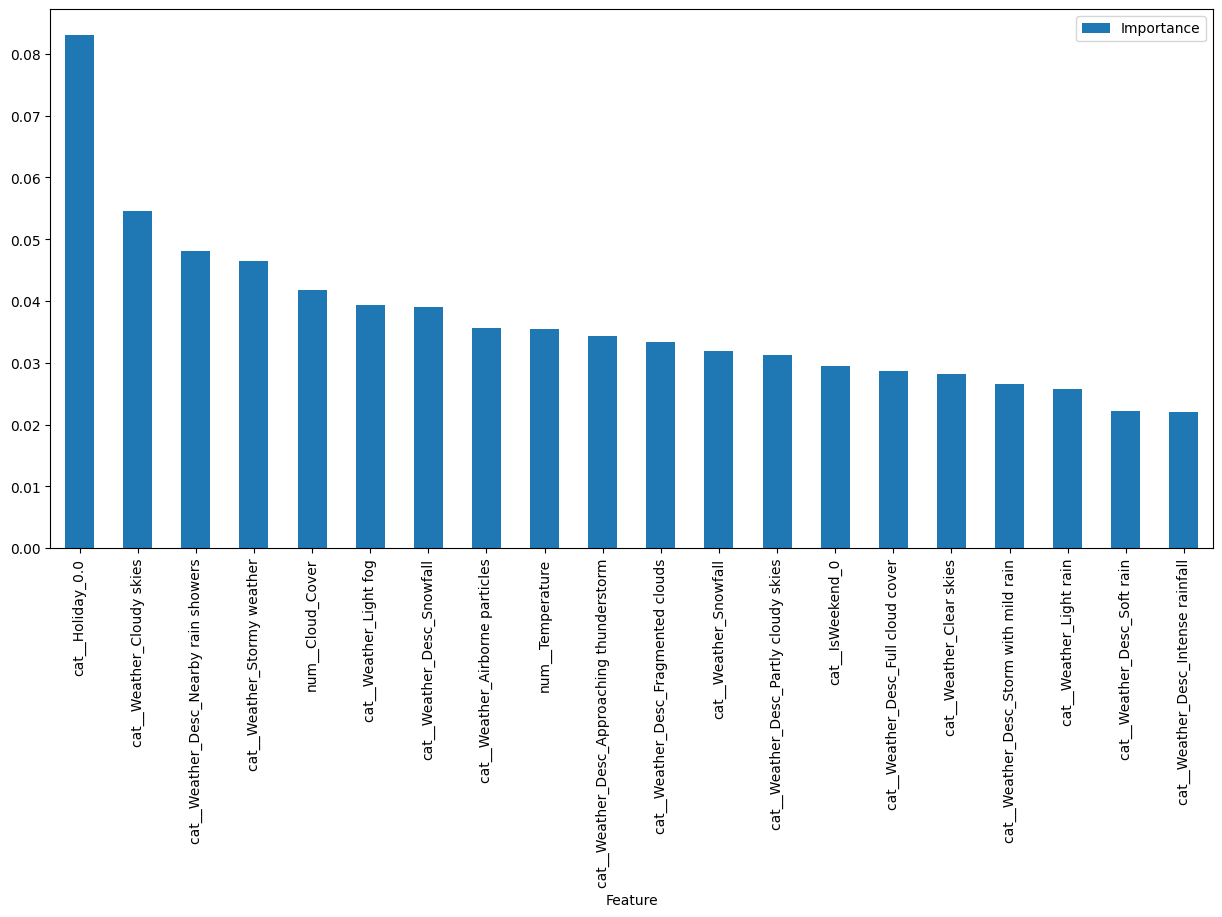

In [30]:
feature_importances.head(20).plot(x='Feature', y='Importance', kind='bar', figsize=(15, 7))

# Leaderboard Rank - 41

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_score:.4f}")

In [ ]:
xgb_ft = XGBRegressor(random_state=42, **best_params)
xgb_ft.fit(X_train, y_train)
y_test = xgb_ft.predict(X_test)


In [ ]:
sample_submission['Traffic_Vol'] = y_test
sample_submission.to_csv(output_dir+os.sep+"Submission_XGB_FT_NT.csv", index=False)

# Did worse